# CSCI 3360 Homework 5 - Brandon Amirouche

## Instructions

Download the dataset from https://archive.ics.uci.edu/ml/datasets/UrbanGB%2C+urban+road+accidents+coordinates+labelled+by+the+urban+center). After extracting \urbanGB.all.zip", work with the data contained in \urbanGB.txt" and answer the following questions.

Note:  you are strongly encouraged to use the KMeans model from scikit-learn.

    1.  Create a scatter plot of the data. Adjust the aspect ratio of your plot so that the width:height ratio is 2:3 (e.g., 10 in x 15 in).  Use the same size for all subsequent scatter plots. 


    2.  Use Kmeans to cluster the data.  Try k = 2, 3, 4, 5 and 6.  For each KMeans model, obtain the following:
        (a)  cluster centers/means
        (b)  size of each cluster
        (c)  inertia, which is the sum of squared distances between each data point to its closest cluster center
        (d)  scatter plot of the clusters distinguished by different colors


    3.  Create a line plot indicating how inertia changes as k varies.


    4.  Based on the line plot of inertia vs. k, which k value seems to be optimal (for our purposes, optimal means where the plot exhibits the sharpest bend)?


    5. Consider the cluster centers generated by the KMeans model with optimal k, which urban cities/areas does each cluster center corresponds to? Note that some cluster centers may be close to multiple major cities.  (Hint:  Google Maps could help with  finding a place by inputting latitude & longitude coordinates)


## Academic Honesty Statement

In [1]:
# first fill in your name
first_name = "Brandon"
last_name  = "Amirouche"

print("****************************************************************")
print("CSCI 3360 Homework 5")
print(f"completed by {first_name} {last_name}")
print(f"""
I, {first_name} {last_name}, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.
""")
print("****************************************************************")

****************************************************************
CSCI 3360 Homework 5
completed by Brandon Amirouche

I, Brandon Amirouche, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.

****************************************************************


## Problem 1

Create a scatter plot of the data. Adjust the aspect ratio of your plot so that the width:height ratio is 2:3 (e.g., 10 in x 15 in).  Use the same size for all subsequent scatter plots.

        Latitude  Longitude
0      -0.310990    53.7802
1      -3.112550    55.8706
2      -0.088533    51.3806
3      -0.326795    51.4476
4      -3.946530    51.6594
...          ...        ...
360172 -0.557803    53.2197
360173 -1.748430    52.4872
360174 -0.128844    51.5126
360175 -1.885640    52.4490
360176 -4.055970    55.8215

[360177 rows x 2 columns]
	Scatter Plot for Longitude vs Latitude:

AxesSubplot(0.125,0.125;0.775x0.755)


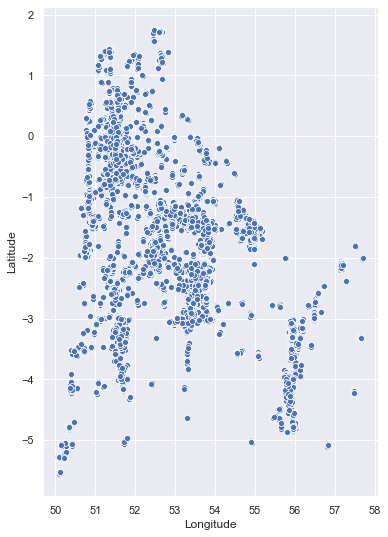

In [61]:
from typing import List
from collections import Counter
from typing import Dict
import csv
from collections import defaultdict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import NamedTuple
from scipy.spatial import distance
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.cluster import KMeans

header_list = ['Latitude', 'Longitude']
data = pd.read_csv('urbanGB.txt', names=header_list)
df = pd.DataFrame(data)
print(df)
print(f"\tScatter Plot for Longitude vs Latitude:\n")
print(sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df, color = 'b'))
sns.set(rc={'figure.figsize':(6,9)})
plt.show()


## Problem 2

Use Kmeans to cluster the data.  Try k = 2, 3, 4, 5 and 6.  For each KMeans model, obtain the following:
    (a)  cluster centers/means
    (b)  size of each cluster
    (c)  inertia, which is the sum of squared distances between each data point to its closest cluster center
    (d)  scatter plot of the clusters distinguished by different colors

In [62]:
from sklearn.decomposition import PCA

kmeans2 = KMeans(n_clusters=2).fit(data)
kmeans3 = KMeans(n_clusters=3).fit(data)
kmeans4 = KMeans(n_clusters=4).fit(data)
kmeans5 = KMeans(n_clusters=5).fit(data)
kmeans6 = KMeans(n_clusters=6).fit(data)

y2 = kmeans2.predict(data)
y3 = kmeans3.predict(data)
y4 = kmeans4.predict(data)
y5 = kmeans5.predict(data)
y6 = kmeans6.predict(data)

K = 2:

The Cluster Size = [200317 159860]
Cluster Centers =           0          1
0 -2.342111  53.362670
1 -0.250577  51.568034
The Intertia = 638168.071828171




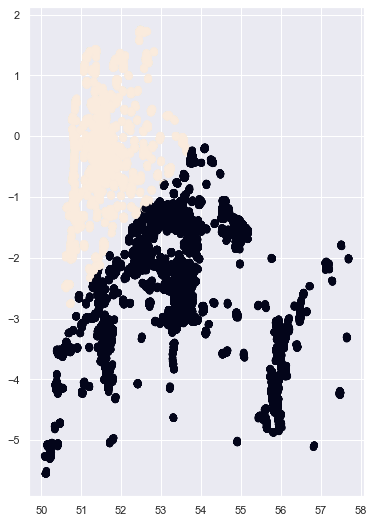

In [63]:
print(f"K = 2:\n")
print(f"The Cluster Size = {np.bincount(y2)}")
print(f"Cluster Centers = {pd.DataFrame(kmeans2.cluster_centers_)}")
print(f"The Intertia = {kmeans2.inertia_}")
plt.scatter(data['Longitude'], data['Latitude'], c = kmeans2.labels_)
print(f"\n")

K = 3:

The Cluster Size = [152396  33134 174647]
Cluster Centers =           0          1
0 -0.193088  51.529118
1 -3.067304  55.601348
2 -2.156854  52.888063
The Intertia = 412972.70800616516




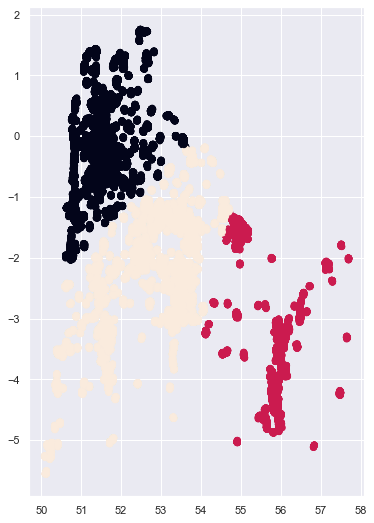

In [64]:
print(f"K = 3:\n")
print(f"The Cluster Size = {np.bincount(y3)}")
print(f"Cluster Centers = {pd.DataFrame(kmeans3.cluster_centers_)}")
print(f"The Intertia = {kmeans3.inertia_}")
plt.scatter(data['Longitude'], data['Latitude'], c = kmeans3.labels_)
print(f"\n")

K = 4:

The Cluster Size = [ 36539 146946 154404  22288]
Cluster Centers =           0          1
0 -3.008896  51.230355
1 -0.146137  51.533451
2 -1.894377  53.368063
3 -3.751982  55.943473
The Intertia = 252195.72550079905




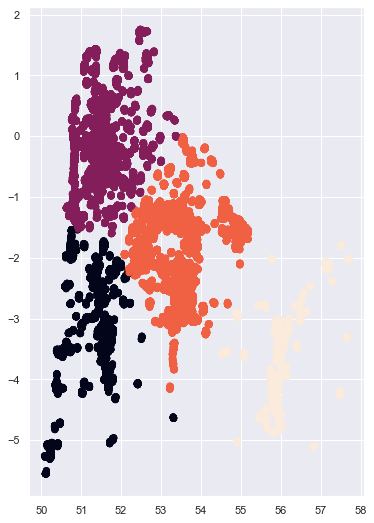

In [68]:
print(f"K = 4:\n")
print(f"The Cluster Size = {np.bincount(y4)}")
print(f"Cluster Centers = {pd.DataFrame(kmeans4.cluster_centers_)}")
print(f"The Intertia = {kmeans4.inertia_}")
plt.scatter(data['Longitude'], data['Latitude'], c = kmeans4.labels_)
print(f"\n")

K = 5:

The Cluster Size = [ 74994 142176  21901  34083  87023]
Cluster Centers =           0          1
0 -1.520591  52.763113
1 -0.117607  51.513806
2 -3.768493  55.964596
3 -3.085634  51.187675
4 -2.179003  53.784567
The Intertia = 201635.56164132492




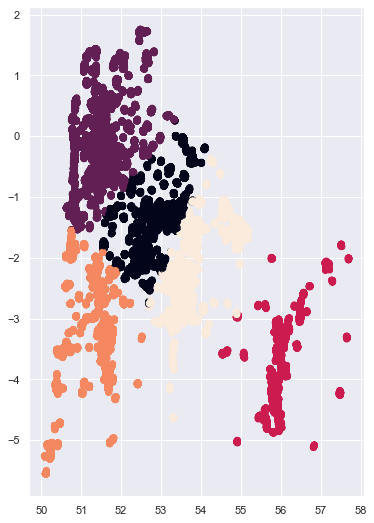

In [66]:
print(f"K = 5:\n")
print(f"The Cluster Size = {np.bincount(y5)}")
print(f"Cluster Centers = {pd.DataFrame(kmeans5.cluster_centers_)}")
print(f"The Intertia = {kmeans5.inertia_}")
plt.scatter(data['Longitude'], data['Latitude'], c = kmeans5.labels_)
print(f"\n")

K = 6:

The Cluster Size = [ 56516 141771  57249  22288  32648  49705]
Cluster Centers =           0          1
0 -2.551914  53.471761
1 -0.114230  51.514305
2 -1.651793  52.512657
3 -3.751982  55.943473
4 -3.119139  51.163618
5 -1.354597  53.977171
The Intertia = 160880.05677836487




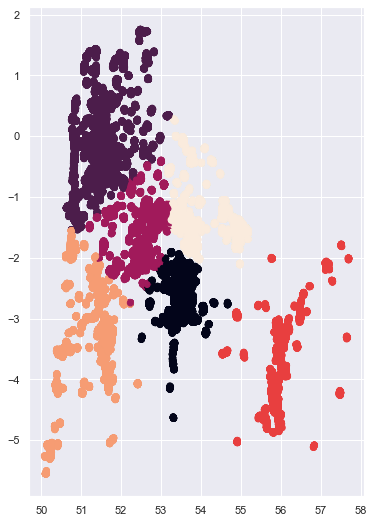

In [67]:
print(f"K = 6:\n")
print(f"The Cluster Size = {np.bincount(y6)}")
print(f"Cluster Centers = {pd.DataFrame(kmeans6.cluster_centers_)}")
print(f"The Intertia = {kmeans6.inertia_}")
plt.scatter(data['Longitude'], data['Latitude'], c = kmeans6.labels_)
print(f"\n")

## Problem 3

Create a line plot indicating how inertia changes as k varies.

ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

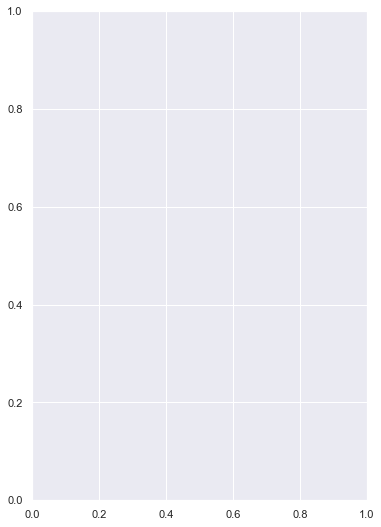

In [42]:
k = [2,3,4,5,6]
inertia = set()
plt.figure(figsize = (6,9))
plt.plot(k,inertia, c = "blue", linewidth = 3)
plt.plot(k, inertia, markersize = 15)
plt.xlabel("k")
plt.ylabel ("inertia")
plt.show()

## Problem 4

Based on the line plot of inertia vs. k, which k value seems to be optimal (for our purposes, optimal means where the plot exhibits the sharpest bend)?

The k value that seems optimal is k = 4. This is because the plot at k = 4 experiences the sharpest bend of all the graphs.

## Problem 5

Consider the cluster centers generated by the KMeans model with optimal k, which urban cities/areas does each cluster center corresponds to? Note that some cluster centers may be close to multiple major cities.  (Hint:  Google Maps could help with  finding a place by inputting latitude & longitude coordinates)

The urban areas associated with this are all in the United Kingdom near Highbridge, Albany, Hayfield, and Falkirk. All of these cities were obtained using google maps.